# Lab 5 - Embedding Adaptors

In [6]:
import os

# Load the secrets file
current_file_path = os.path.abspath("04_cross_encoder.ipynb")
# print(f"current file: {current_file_path}")

# Get the parent directory of the current file's directory
parent_directory = os.path.dirname(current_file_path)
# print(f"parent file: {parent_directory}")

# Get the parent directory of the parent directory
Child_DIR = os.path.dirname(parent_directory)
# print(f"child file: {Child_DIR}")

# Define the path to the client_secret.json file
microsoft_annual_report_2023 = os.path.join(Child_DIR, '2023_Annual_Report.pdf')
print(f"client file: {microsoft_annual_report_2023}")

client file: d:\Dell\Documents\code\langchain\RAG\chromadb\2023_Annual_Report.pdf


In [7]:
from pypdf import  PdfReader

reader = PdfReader(microsoft_annual_report_2023)
pdf_texts = [page.extract_text().strip() for page in reader.pages]

pdf_texts = [text for text in pdf_texts if text]

print(f"Total number of pages: {len(reader.pages)}")
print(pdf_texts[0])

Total number of pages: 84
1 Dear shareholders, colleagues, customers, and partners,  
We are living through a time of historic challenge and opportunity. As I write this, the world faces ongoing economic, social , 
and geopolitical volatility. At the same time, we have entered a new age of AI that will fundamentally transform productivity  
for every individual, organization, and industry on earth, and help us address some of our most pressing challenges.  
This next generation of AI will reshape every software category and every business, including our own. Forty -eight years 
after its founding, Microsoft remains a consequential company because time and time again —from PC/Server, to 
Web/Internet, to Cloud/Mob ile—we have adapted to technological paradigm shifts. Today, we are doing so once again, as 
we lead this new era.  
Amid this transformation, our mission to empower every person and every organization on the planet to achieve 
more  remains constant. As a company, we believe 

In [ ]:
from langchain.text_splitter import  RecursiveCharacterTextSplitter

character_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ". ", " ", ""],
    chunk_size=1000,
    chunk_overlap=0
)
character_split_texts = character_splitter.split_text('\n\n'.join(pdf_texts))

print(character_split_texts[10])
print(f"\nTotal chunks: {len(character_split_texts)}")

import chromadb.utils.embedding_functions as embedding_functions
# from langchain_openai import OpenAIEmbeddings
import chromadb

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key=OPENAI_API_KEY,
                model_name="text-embedding-3-small"
            )

chroma_client = chromadb.Client()
chroma_collection = chroma_client.create_collection("2023_annual_reports", embedding_function=openai_ef)

ids = [str(i) for i in range(len(character_split_texts))]

chroma_collection.add(ids=ids, documents=character_split_texts)
print(chroma_collection.count())


3 Industry  
Across industries, we are rapidly becoming the partner of choice for any organization looking to generate real value from 
AI. In healthcare, for example, we introduced the world’s first fully automated clinical documentation application, DAX 
Copilot. The a pplication helps physicians reduce documentation time by half, freeing them to spend more time face to face 
with patients. And Epic will integrate it directly into its electronic health records system.  
And, in retail, we introduced new tools to help companies manage their day -to-day operations and digitize their physical 
stores.  
Modern work  
We are rapidly evolving Microsoft 365 into an AI -first platform that enables every individual to amplify their creativity and 
productivity, with both our established applications like Office and Teams, as well as new apps like Designer, Stream, and 
Loop. M icrosoft 365 is designed for today’s digitally connected, distributed workforce.

Total chunks: 344


Insert of existing embedding ID: 0
Insert of existing embedding ID: 1
Insert of existing embedding ID: 2
Insert of existing embedding ID: 3
Insert of existing embedding ID: 4
Insert of existing embedding ID: 5
Insert of existing embedding ID: 6
Insert of existing embedding ID: 7
Insert of existing embedding ID: 8
Insert of existing embedding ID: 9
Insert of existing embedding ID: 10
Insert of existing embedding ID: 11
Insert of existing embedding ID: 12
Insert of existing embedding ID: 13
Insert of existing embedding ID: 14
Insert of existing embedding ID: 15
Insert of existing embedding ID: 16
Insert of existing embedding ID: 17
Insert of existing embedding ID: 18
Insert of existing embedding ID: 19
Insert of existing embedding ID: 20
Insert of existing embedding ID: 21
Insert of existing embedding ID: 22
Insert of existing embedding ID: 23
Insert of existing embedding ID: 24
Insert of existing embedding ID: 25
Insert of existing embedding ID: 26
Insert of existing embedding ID: 27
In

344


In [10]:
chroma_collection = chroma_client.get_collection("2023_annual_reports", embedding_function=openai_ef)
print(chroma_collection.count())

344


In [11]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [12]:
def project_embedding(embeddings, umap_transform):
    umap_embedding = np.empty((len(embeddings), 2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embedding[i] = umap_transform.transform([embedding])
    return umap_embedding

  0%|          | 0/344 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  0%|          | 1/344 [00:12<1:10:06, 12.26s/it]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: Futur

(np.float64(-0.428800156340003),
 np.float64(9.926715103909373),
 np.float64(7.858991384506226),
 np.float64(14.24667477607727))

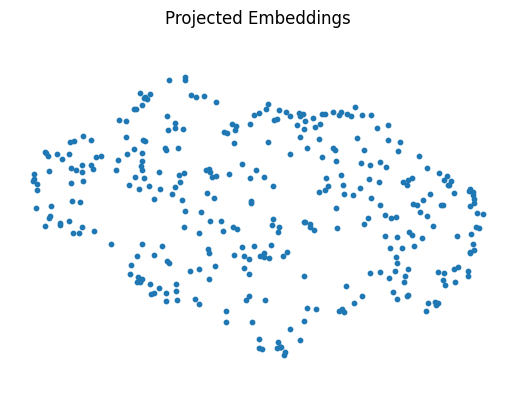

In [13]:
projected_dataset_embeddings = project_embedding(embeddings, umap_transform)

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [14]:
from langchain_openai import ChatOpenAI

# Initialize the model
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.3)

def generate_queries(query):
    messages = [
        {
            "role": "system",
            "content": "You are a helpful expert financial research assistant. Your users are asking questions about an annual report. "
            "Suggest 10 to 15 short questions to help them find the information they need, for the provided question. "
            "Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic."
            "Make sure they are complete questions, and that they are related to the original question."
            "Output one question per line. Do not number the questions."
        },
        {
            "role": "user",
            "content": query
        }
    ]

    result = llm.invoke(messages)
    response = result.content.split("\n")
    return response

In [15]:
original_query = "What were the most important factors that contributed to increases in revenue?"
generated_queries = generate_queries(original_query)

# Ensure that generated_queries is a list of strings
print("Generated Queries:")
for query in generated_queries:
    print(query)

Generated Queries:
What was the percentage increase in revenue?  
Which products or services saw the highest growth?  
Did any new markets contribute to revenue growth?  
What role did pricing strategies play in revenue increases?  
Were there any significant changes in customer demographics?  
How did marketing efforts impact revenue?  
What external economic factors influenced revenue growth?  
Did partnerships or collaborations affect revenue?  
How did operational efficiency contribute to revenue increases?  
What was the impact of technology on revenue growth?  
Were there any regulatory changes that helped increase revenue?  
How did customer retention rates affect revenue?  
What feedback did customers provide regarding products or services?  
Did seasonal trends play a role in revenue increases?  
What were the key performance indicators for revenue growth?


In [16]:
# # Assuming chroma_collection is properly configured
results = chroma_collection.query(query_texts=generated_queries, n_results=10, include=['documents', 'embeddings'])
retrieved_documents = results['documents']

# Print out the retrieved documents
print("Retrieved Documents:")
for doc in retrieved_documents[0]:
    print(doc)

Retrieved Documents:
30 Cost of revenue increased $3.2  billion or 5% driven by growth in Microsoft Cloud, offset in part by the change in accounting 
estimate.  
Gross margin increased $10.4  billion or 8% driven by growth in Intelligent Cloud and Productivity and Business Processes 
and the change in accounting estimate, offset in part by a decline in More Personal Computing.  
• Gross margin percentage increased slightly. Excluding the impact of the change in accounting estimate, gross 
margin percentage decreased 1 point driven by declines in Intelligent Cloud and More Personal Computing, 
offset in part by sales mix shift betwee n our segments.  
• Microsoft Cloud gross margin percentage increased 2 points to 72%. Excluding the impact of the change in 
accounting estimate, Microsoft Cloud gross margin percentage decreased slightly driven by a decline in Azure 
and other cloud services and sales mix s hift to Azure and other cloud services, offset in part by improvement 
in Office 

In [17]:
def evaluate_results(query, statement, model="gpt-3.5-turbo"):
    messages = [
    {
        "role": "system",
        "content": "You are a helpful expert financial research assistant. You help users analyze financial statements to better understand companies. "
        "For the given query, evaluate whether the following satement is relevant."
        "Output only 'yes' or 'no'."
    },
    {
        "role": "user",
        "content": f"Query: {query}, Statement: {statement}"
    }
    ]

    response = llm.invoke(messages, model=model)
    result = response.content.lower()
    if result == "yes":
        return 1
    return -1

In [18]:
retrieved_embeddings = results['embeddings']
query_embeddings = openai_ef(generated_queries)

adapter_query_embeddings = []
adapter_doc_embeddings = []
adapter_labels = []

In [19]:
for q, query in enumerate(tqdm(generated_queries)):
    for d, doc in enumerate(retrieved_documents[q]):
        adapter_query_embeddings.append(query_embeddings[q])
        adapter_doc_embeddings.append(retrieved_embeddings[q][d])
        adapter_labels.append(evaluate_results(query, doc))

100%|██████████| 15/15 [01:44<00:00,  6.96s/it]


In [20]:
len(adapter_labels)

150

In [21]:
import torch

adapter_query_embeddings = torch.Tensor(np.array(adapter_query_embeddings))
adapter_doc_embeddings = torch.Tensor(np.array(adapter_doc_embeddings))
adapter_labels = torch.Tensor(np.expand_dims(np.array(adapter_labels),1))

dataset = torch.utils.data.TensorDataset(adapter_query_embeddings, adapter_doc_embeddings, adapter_labels)

## Setting up the model

In [22]:
def model(query_embedding, document_embedding, adaptor_matrix):
    updated_query_embedding = torch.matmul(adaptor_matrix, query_embedding)
    return torch.cosine_similarity(updated_query_embedding, document_embedding, dim=0)

In [23]:
def mse_loss(query_embedding, document_embedding, adaptor_matrix, label):
    return torch.nn.MSELoss()(model(query_embedding, document_embedding, adaptor_matrix), label)

In [24]:
# Initialize the adaptor matrix
mat_size = len(adapter_query_embeddings[0])
adapter_matrix = torch.randn(mat_size, mat_size, requires_grad=True)

min_loss = float('inf')
best_matrix = None

for epoch in tqdm(range(100)):
    for query_embedding, document_embedding, label in dataset:
        loss = mse_loss(query_embedding, document_embedding, adapter_matrix, label)

        if loss < min_loss:
            min_loss = loss
            best_matrix = adapter_matrix.clone().detach().numpy()

        loss.backward()
        with torch.no_grad():
            adapter_matrix -= 0.01 * adapter_matrix.grad
            adapter_matrix.grad.zero_()

  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 100/100 [07:23<00:00,  4.44s/it]


In [25]:
print(f"Best loss: {min_loss.detach().numpy()}")

test_vector = torch.ones((mat_size,1))
scaled_vector = np.matmul(best_matrix, test_vector).numpy()

Best loss: 0.7918187379837036


C:\Users\Dell\AppData\Local\Temp\ipykernel_19376\707520836.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  scaled_vector = np.matmul(best_matrix, test_vector).numpy()


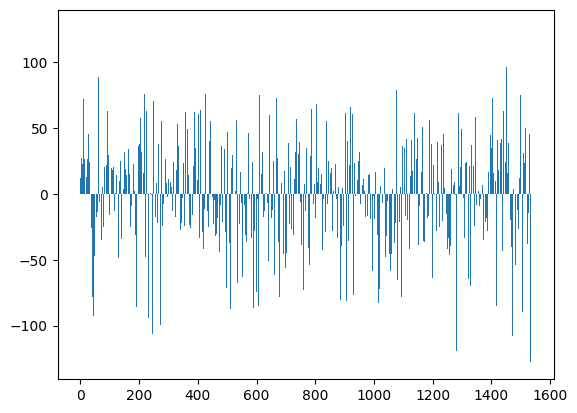

In [26]:
import matplotlib.pyplot as plt
plt.bar(range(len(scaled_vector)), scaled_vector.flatten())
plt.show()


In [28]:
query_embeddings = openai_ef(generated_queries)
adapted_query_embeddings = np.matmul(best_matrix, np.array(query_embeddings).T).T

projected_query_embeddings = project_embedding(query_embeddings, umap_transform)
projected_adapted_query_embeddings = project_embedding(adapted_query_embeddings, umap_transform)

  0%|          | 0/15 [00:00<?, ?it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
  7%|▋         | 1/15 [00:00<00:02,  6.08it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
 20%|██        | 3/15 [00:00<00:01, 11.34it/s]c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\open-service-uQHKusx_-py3.12\Lib\site-packag

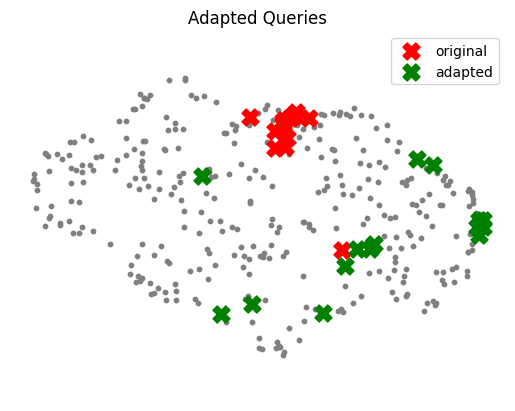

In [29]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embeddings[:, 0], projected_query_embeddings[:, 1], s=150, marker='X', color='r', label="original")
plt.scatter(projected_adapted_query_embeddings[:, 0], projected_adapted_query_embeddings[:, 1], s=150, marker='X', color='green', label="adapted")

plt.gca().set_aspect('equal', 'datalim')
plt.title("Adapted Queries")
plt.axis('off')
plt.legend()